# Understanding Descriptive Statistics

Import the necessary libraries here:

In [249]:
# Libraries
import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [35]:
range(1,7)

range(1, 7)

In [20]:
dice = list(range(1,7))
print(dice)

[1, 2, 3, 4, 5, 6]


In [27]:
def dice_roll (times):
    dice_results = pd.DataFrame(columns = ['Result'])
    for i in range (times):
        dice_results.loc[i, 'Result'] = random.choice(dice)
    dice_results['Result'] = dice_results['Result'].astype(int)
    return dice_results
        
dice_roll(10)

,Result
0,3
1,4
2,4
3,6
4,1
5,1
6,6
7,5
8,2
9,5


#### 2.- Plot the results sorted by value.

In [68]:
dice_roll_10 = dice_roll(10)

In [69]:
dice_roll_10

,Result
0,5
1,3
2,1
3,2
4,3
5,5
6,1
7,2
8,6
9,4


In [70]:
dice_roll_10 = dice_roll_10.sort_values(by = ['Result'])

In [71]:
dice_roll_10

,Result
2,1
6,1
3,2
7,2
1,3
4,3
9,4
0,5
5,5
8,6


In [72]:
dice_roll_10.index = range(10)

In [73]:
dice_roll_10

,Result
0,1
1,1
2,2
3,2
4,3
5,3
6,4
7,5
8,5
9,6


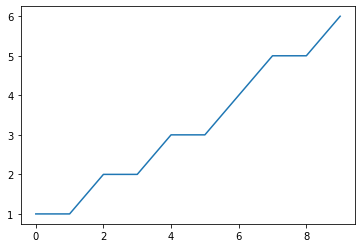

In [74]:
#plt.plot(dice_roll_10)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([2., 2., 2., 1., 2., 1.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

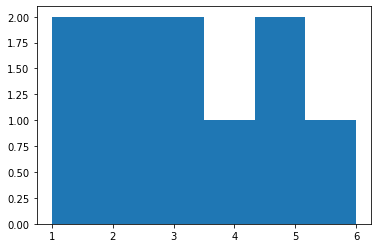

In [75]:
# your code here
plt.hist(dice_roll_10['Result'], bins = 6)

In [ ]:
"""
your comments here
"""

The values that have a straight line ar the ones that have more ocurrences. 

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [91]:
values = dice_roll(10)

In [92]:
values

,Result
0,6
1,2
2,6
3,5
4,1
5,5
6,1
7,5
8,3
9,1


In [93]:
# your code here
def mean (lst):
    return (sum(lst)/len(lst))

In [94]:
mean(values['Result'])

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [193]:
lst_values = list(values['Result'])
lst_values

[6, 2, 6, 5, 1, 5, 1, 5, 3, 1]

In [194]:
def frequency (lst):
    frequency_dist = {item:lst.count(item) for item in lst}
    return frequency_dist

In [195]:
frequency(lst_values)

{6: 2, 2: 1, 5: 3, 1: 3, 3: 1}

In [196]:
frequency(list(values['Result'])).values()

dict_values([2, 1, 3, 3, 1])

In [197]:
def mean_frequency (freq_dist):
    frequence = freq_dist.values()
    keys = freq_dist.keys()
    multiplication =  list(map((lambda m, n: m*n), frequence, keys))
    mean = sum(multiplication)/sum(frequence)
    return mean

In [198]:
mean_frequency(frequency(lst_values))

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [199]:
def median (lst):
    size = len(lst)
    lst.sort(reverse = False)
    if (size % 2) == 0:
        return (lst[int(size/2)] + lst[int((size/2)-1)])/2
    else:
        return (lst[floor(size/2)])

In [200]:
median(lst_values)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [201]:
factor = {1:0.25, 2:0.5, 3:0.75}

In [202]:
factor[1]

0.25

In [203]:
factor = {1:0.25, 2:0.5, 3:0.75}
def quartil (lst, quartil):
    lst.sort(reverse = False)
    size = len(lst)
    if (size % 2) == 0:
        return (lst[int(size*factor[quartil])] + lst[int((size*factor[quartil])-1)])/2
    else:
        return (lst[floor(size*factor[quartil])])

In [204]:
quartil (lst_values, 2)

4.0

In [205]:
quartil (lst_values, 1)

1.0

In [206]:
quartil (lst_values, 3)

5.0

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [211]:
data = pd.read_csv("/Users/sofiacostadesousa/Desktop/Ironhack/02.09/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv") 

In [214]:
data

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [232]:
data = data.sort_values (by = ['roll','value'])
data

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [224]:
len(data['value'])

100

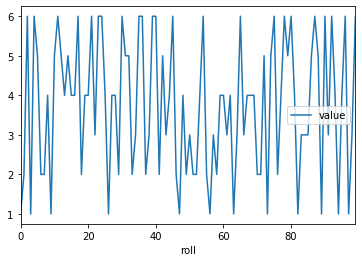

In [233]:
data.plot (x = 'roll', y = 'value')
plt.show()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [235]:
mean (data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [237]:
frequency(list(data['value']))

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

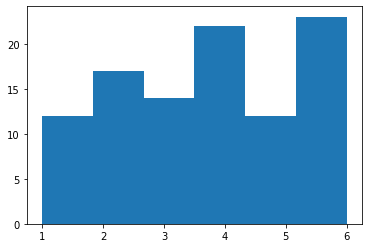

In [238]:
plt.hist(data['value'], bins = 6)

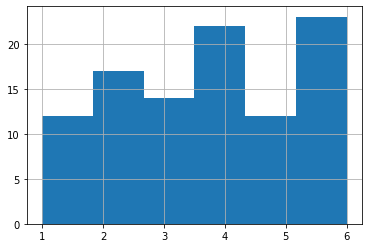

In [241]:
data['value'].hist(bins = 6)

In [ ]:
'''the mean falls more on the right side, where the frequency is higher'''

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [242]:
data = pd.read_csv("/Users/sofiacostadesousa/Desktop/Ironhack/02.09/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv") 

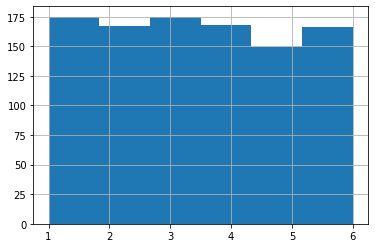

In [243]:
data['value'].hist(bins = 6)

In [ ]:
"""
now there is a more homogeneous distribution because we have a bigger sample
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [265]:
data = pd.read_csv("/Users/sofiacostadesousa/Desktop/Ironhack/02.09/lab-understanding-descriptive-stats/data/ages_population.csv") 

In [266]:
data.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


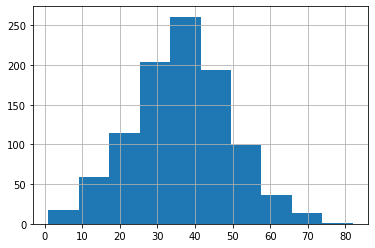

In [267]:
data['observation'].hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [268]:
np.mean(data)

observation    36.56
dtype: float64

In [269]:
np.median(data)

37.0

In [270]:
data['observation'].std()

12.81649962597677

In [ ]:
"""
both median and mean yes, the std is not clear just through the histogram
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [283]:
data2 = pd.read_csv("/Users/sofiacostadesousa/Desktop/Ironhack/02.09/lab-understanding-descriptive-stats/data/ages_population2.csv") 

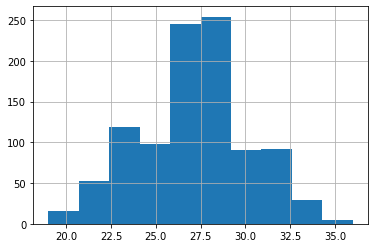

In [284]:
data2['observation'].hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
it is not as clear as the one before, probably the std will be higher, nevertheless it is still quite symettric so mean and median should be close"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [285]:
np.mean(data2)

observation    27.155
dtype: float64

In [286]:
np.median(data2)

27.0

In [287]:
data2['observation'].std()

2.9698139326891835

In [ ]:
"""
the std is actually lower"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [292]:
data3 = pd.read_csv("/Users/sofiacostadesousa/Desktop/Ironhack/02.09/lab-understanding-descriptive-stats/data/ages_population.csv") 

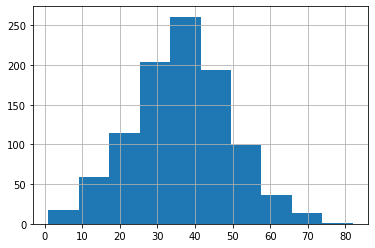

In [293]:
data3['observation'].hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [294]:
np.mean(data3)

observation    36.56
dtype: float64

In [295]:
np.median(data3)

37.0

In [296]:
data3.std()

observation    12.8165
dtype: float64

In [ ]:
"""
they are quite similar"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [288]:
np.percentile(data2, 25)

25.0

In [291]:
np.percentile(data2, 50)

27.0

In [289]:
np.percentile(data2, 75)

29.0

In [290]:
np.percentile(data2, 100)

36.0

In [ ]:
"""
for the four quartiles the values remain close to the mean, so the standard deviation is low"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [297]:
np.percentile(data3, 25)

28.0

In [298]:
np.percentile(data3, 50)

37.0

In [299]:
np.percentile(data3, 75)

45.0

In [ ]:
"""
in the 3 dataframe the dispersion of values is higher"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""